In [2]:
# 단순선형회귀분석 

# 필요한 라이브러리 불러오기 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os

In [3]:
# 선형회귀 관련 sklearn 라이브러리 불러오기 

from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error, r2_score 

# 선형회귀 관련 statsmodels 라이브러리 
import statsmodels.api as sm 

In [4]:
# 간단한 예제 - 몸풀기 

# data 
np.array([[0],[1],[2]])

array([[0],
       [1],
       [2]])

In [5]:
X = np.array([[0],[1],[2]])

In [6]:
np.array([0,1.2,1.6])

array([0. , 1.2, 1.6])

In [7]:
y = np.array([0,1.2,1.6])

In [8]:
# 선형회귀 객체 생성 

reg = linear_model.LinearRegression()

In [9]:
# training  >> fit : 모델에 적합하게 데이터 정렬

reg.fit(X,y)

LinearRegression()

In [10]:
# traing data로 예측 

pred_train = reg.predict(X)
pred_train

array([0.13333333, 0.93333333, 1.73333333])

In [11]:
y

array([0. , 1.2, 1.6])

In [12]:
# test data로 예측 

pred_test = reg.predict([[1.5]])
pred_test

array([1.33333333])

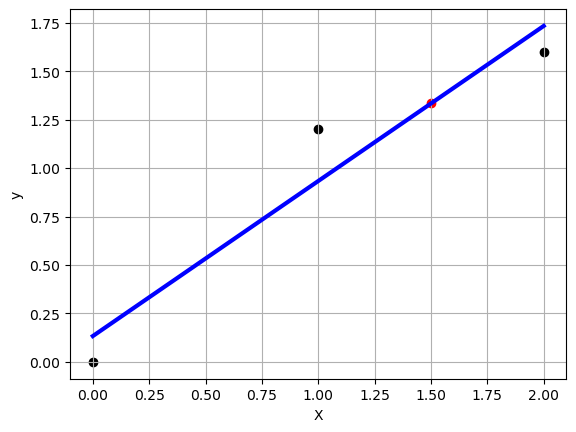

In [13]:
# plot outputs 

plt.scatter(X,y, color='black')
plt.scatter(1.5, pred_test, color='red') # 예측값
plt.plot(X, pred_train, color='blue', linewidth=3)

plt.xlabel('X')
plt.ylabel('y')

plt.grid() 
plt.show()

In [14]:
# test data 예측값 

pred_test

array([1.33333333])

In [15]:
# coefficient (회귀계수, 기울기: weight)
reg.coef_

array([0.8])

In [16]:
path ='./data/Advertising.csv'

ad = pd.read_csv(path, index_col=0)

In [17]:
ad[:10]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [18]:
# advertising data 활용, 선형회귀 분석 

# train data / test data 분리 >> 과적합 방지 

train = ad[:-20]
test = ad[-20:]

In [19]:
# train data의 feature와 response 분리 

ad.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [20]:
train_X = train[['TV', 'Radio', 'Newspaper']]
train_y = train[['Sales']]

In [21]:
# test data의 feature와 response 분리 

test_X = test[['TV', 'Radio', 'Newspaper']]
test_y = test[['Sales']]

In [22]:
# 선형회귀 객체 생성 

regr = linear_model.LinearRegression()

In [23]:
# train data 활용 적합(fit) >> 반드시 train data 활용 

regr.fit(train_X[["TV"]], train_y) # train data 중 TV 만 사용 

LinearRegression()

In [24]:
# train data 활용 예측 
train_y_pred = regr.predict(train_X[["TV"]])
train_y_pred

array([[17.95508512],
       [ 9.25168867],
       [ 7.97150159],
       [14.26927176],
       [15.64324544],
       [ 7.57290854],
       [ 9.86130157],
       [12.80151147],
       [ 7.56821921],
       [16.53421814],
       [10.26458395],
       [17.23292831],
       [ 8.28099737],
       [11.73703357],
       [16.73585933],
       [16.32788762],
       [10.34430256],
       [20.36071141],
       [10.40995318],
       [14.0723199 ],
       [17.40643352],
       [18.29740621],
       [ 7.78392839],
       [17.87067718],
       [10.08638941],
       [19.49318536],
       [13.86598938],
       [18.42401812],
       [18.83198983],
       [10.4756038 ],
       [20.89998435],
       [12.45919038],
       [11.72296558],
       [19.61979727],
       [11.65262563],
       [20.79681909],
       [19.68075856],
       [10.66786633],
       [ 9.18603805],
       [17.85660919],
       [16.66083005],
       [15.4650509 ],
       [20.93280966],
       [16.86716057],
       [ 8.34195866],
       [15

In [25]:
# test data 활용 예측 

test_y_pred = regr.predict(test_X[['TV']])
test_y_pred

array([[14.50842759],
       [17.41112285],
       [ 9.80034028],
       [20.65144986],
       [19.06645633],
       [16.7780633 ],
       [13.70655216],
       [16.12624643],
       [20.57642058],
       [ 8.04184154],
       [ 9.01722218],
       [10.70538097],
       [ 7.97150159],
       [14.98673924],
       [14.18486382],
       [ 8.95626089],
       [11.58228568],
       [15.4650509 ],
       [20.46387667],
       [18.04887172]])

In [26]:
# 회귀계수(기울기) coefficients

print("Coefficients: ", regr.coef_)
print()

# train data의 MSE 
print("Train data MSE: %.3f " % mean_squared_error(train_y, train_y_pred))
print()
# test data의 MSE

print("Test data MSE: %.3f " % mean_squared_error(test_y, test_y_pred))
print()

# train data의 r_square
print("train data_R^2: %.3f"% r2_score(train_y, train_y_pred))
print()
# test data의 r_square
print("test data_R^2: %.3f"% r2_score(test_y, test_y_pred))

Coefficients:  [[0.0468933]]

Train data MSE: 10.316 

Test data MSE: 12.324 

train data_R^2: 0.607

test data_R^2: 0.642


In [27]:
# statsmodels 선형회귀 분석 

# statsmodels 사용을 위위한 X0 feature(intercept) 추가 
# statsmodles의  OLS 함수 : 데이터 내에 intercept 해당하는 변수 필요 

In [28]:
sm_train_X = train_X
sm_train_X['X0'] = 1

sm_test_X = test_X
sm_test_X['X0'] = 1

/var/folders/xq/t5nlwtvx1qd5q2ny8rlxn70h0000gn/T/ipykernel_12588/1099202473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_train_X['X0'] = 1
/var/folders/xq/t5nlwtvx1qd5q2ny8rlxn70h0000gn/T/ipykernel_12588/1099202473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_test_X['X0'] = 1


In [29]:
sm_train_X, sm_test_X

(        TV  Radio  Newspaper  X0
 0    230.1   37.8       69.2   1
 1     44.5   39.3       45.1   1
 2     17.2   45.9       69.3   1
 3    151.5   41.3       58.5   1
 4    180.8   10.8       58.4   1
 ..     ...    ...        ...  ..
 175  276.9   48.9       41.8   1
 176  248.4   30.2       20.3   1
 177  170.2    7.8       35.2   1
 178  276.7    2.3       23.7   1
 179  165.6   10.0       17.6   1
 
 [180 rows x 4 columns],
         TV  Radio  Newspaper  X0
 180  156.6    2.6        8.3   1
 181  218.5    5.4       27.4   1
 182   56.2    5.7       29.7   1
 183  287.6   43.0       71.8   1
 184  253.8   21.3       30.0   1
 185  205.0   45.1       19.6   1
 186  139.5    2.1       26.6   1
 187  191.1   28.7       18.2   1
 188  286.0   13.9        3.7   1
 189   18.7   12.1       23.4   1
 190   39.5   41.1        5.8   1
 191   75.5   10.8        6.0   1
 192   17.2    4.1       31.6   1
 193  166.8   42.0        3.6   1
 194  149.7   35.6        6.0   1
 195   38.2    3.7   

In [30]:
# 훈련 

results = sm.OLS(train_y, sm_train_X[["X0", "TV"]]).fit()
# 결과변수(종속변수)인 train_y를 먼저 적어줌. 

# 훈련결과 확인
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     275.2
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           5.76e-38
Time:                        23:44:43   Log-Likelihood:                -465.44
No. Observations:                 180   AIC:                             934.9
Df Residuals:                     178   BIC:                             941.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             7.1649      0.478     14.978      0.000       6.221       8.109
TV             0.0469      0.003     16.589      0.000       0.041       0.052
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.547
Skew:                          -0.127   Prob(JB):                        0.761
Kurtosis:                       2.906   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

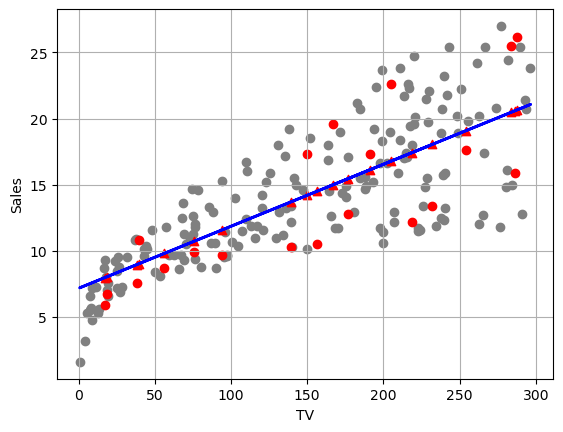

In [31]:
# 데이터 시각화 

plt.scatter(train_X['TV'], train_y['Sales'], color = 'gray') # train data 
plt.scatter(test_X['TV'], test_y['Sales'], color = 'red') # test data

plt.plot(train_X['TV'], train_y_pred, color='blue', linewidth=2)
plt.scatter(test_X['TV'], test_y_pred, color='red', marker='^')

plt.xlabel('TV')
plt.ylabel('Sales')

plt.grid()
plt.show()